# a Region of Interest Mask

In [1]:
"""
At this point, however, it would still be tricky to extract the exact lines automatically, 
because we still have some other objects detected around the periphery that aren't lane lines.

In this case, I'll assume that the front facing camera that took the image is mounted in a fixed position on the car, 
such that the lane lines will always appear in the same general region of the image. 
Next, I'll take advantage of this by adding a criterion to only consider 
pixels for color selection in the region where we expect to find the lane lines.

Check out the code below. The variables left_bottom, right_bottom, 
and apex represent the vertices of a triangular region that I would like to retain for my color selection, 
while masking everything else out. 
Here I'm using a triangular mask to illustrate the simplest case, but later you'll use a quadrilateral, 
and in principle, you could use any polygon.
"""

"\nAt this point, however, it would still be tricky to extract the exact lines automatically, \nbecause we still have some other objects detected around the periphery that aren't lane lines.\n\nIn this case, I'll assume that the front facing camera that took the image is mounted in a fixed position on the car, \nsuch that the lane lines will always appear in the same general region of the image. \nNext, I'll take advantage of this by adding a criterion to only consider \npixels for color selection in the region where we expect to find the lane lines.\n\nCheck out the code below. The variables left_bottom, right_bottom, \nand apex represent the vertices of a triangular region that I would like to retain for my color selection, \nwhile masking everything else out. \nHere I'm using a triangular mask to illustrate the simplest case, but later you'll use a quadrilateral, \nand in principle, you could use any polygon.\n"

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from pandas import DataFrame
%matplotlib inline

# Read in the image and print some stats
image = mpimg.imread('lane_.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


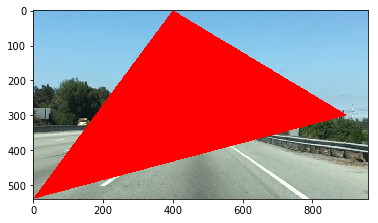

In [5]:
# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
# the polynomial fit degree is 1
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)

In [53]:
# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

In [54]:
print(xsize)
print(ysize)

960
540


In [78]:
# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [0, image.shape[0]-1]
right_bottom = [900, image.shape[0]-1]
apex = [475, 320]

In [79]:
# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
thres = 200
color_select[color_thresholds | ~region_thresholds] = [thres, thres, thres]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [0, 0, 0]

In [80]:
DataFrame(region_thresholds).to_csv('test.csv',index = False, sep=',', encoding='utf-8')

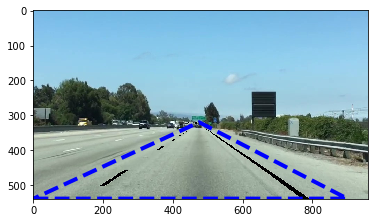

In [81]:
# Display the image and show region and color selections
#plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)